In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
import matplotlib.pyplot as plt

In [3]:
iris=pd.read_csv('IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris['type'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Seperating X and target variable Y

In [8]:
X=iris.iloc[:,0:4]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y=iris['type']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: type, dtype: object

In [10]:
# Converting to numpy array
X=X.to_numpy()
y=y.to_numpy()

In [11]:
type(y)

numpy.ndarray

In [42]:
print(X.shape)
print(y.shape) #(150,1)

(150, 4)
(150,)


In [76]:
### Test Train Split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30,shuffle = True,random_state=42)

In [ ]:
# X => y
# X_train => y_train
# X_test => y_test

In [13]:
print("Train size =",len(X_train))
print("Test size =",len(X_test))

Train size = 105
Test size = 45


### Training with KNeighborsClassifier

In [66]:
clf =KNeighborsClassifier(2) #K=5
clf.fit(X_train, y_train) # function to start training

KNeighborsClassifier(n_neighbors=2)

In [67]:
# Calcualting training accuracy 
train_acc=clf.score(X_train,y_train)
print("Training Accuracy",train_acc*100)
# Calcualting testing accuracy 
test_acc=clf.score(X_test,y_test)
print("Testing Accuracy",test_acc*100)

Training Accuracy 96.19047619047619
Testing Accuracy 100.0


In [43]:
test_points = np.array([[6.8,2.8,4.8,1.4]#Iris-versicolor
                       ,[7.2,3,5.8,1.6]] # Iris-virginica
                      ) 



clf.predict(test_points)

array(['Iris-versicolor', 'Iris-virginica'], dtype=object)

In [46]:
# Prediction on a test_data point

index = 10
test_data=X_test[index]
truth = y_test[index]
pred=clf.predict([test_data]) # function to predict
print("Sample test data =",test_data)
print("Prediction =",pred[0])
print("Ground Truth =",truth)


Sample test data = [6.5 3.2 5.1 2. ]
Prediction = Iris-virginica
Ground Truth = Iris-virginica


### Confusion Matrix for predictions

In [68]:

def plotConfusionMatrix(mat):
    # Normalise
    # normalized_mat = mat.astype('float') /mat.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(mat,index=iris['type'].unique(),columns=iris['type'].unique())
    plt.figure(figsize=(10,7))
    sns.set(font_scale=1)  # for label size
    sns.heatmap(df_cm, annot=True,fmt='d', cbar=False)  # font size

    plt.show()

[[31  0  0]
 [ 0 37  0]
 [ 0  4 33]]


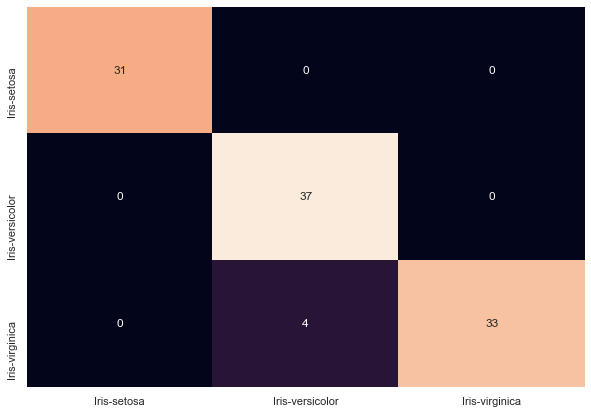

In [75]:
predictions = clf.predict(X_train) #45

grount_truth = y_train
confusion_mat=confusion_matrix(grount_truth,predictions)
print(confusion_mat)
plotConfusionMatrix(confusion_mat)